In [2]:
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd

In [4]:
gdf = gpd.read_file("./shp/dbgt_building_porch_1_lod1.shp")
gdf.head

<bound method NDFrame.head of    OBJECTID                                   CLASSID SCRIL DATA_FIN DATA_INI  \
0   13514.0  RLB-b2593efa-3aaf-4ccb-acd0-8e271a79b6bf  None     None     None   
1   19659.0  RLB-30a931cc-b87d-487b-8755-3e93a2f9b3ef  None     None     None   

  FONTE SCALA  UN_VOL_AV UN_VOL_EX UN_VOL_POR  UN_VOL_QE  \
0  None    04     17.699        02         01     17.699   
1  None    04      1.613        02         06      1.613   

                                     CEDIUV DATA_CONS  Extru  hgt_lod1  \
0  RLB-c7297a7c-9381-4ce9-92c7-b835d856805f      None    0.0      17.7   
1  RLB-c7297a7c-9381-4ce9-92c7-b835d856805f      None    0.0      17.7   

   lod1_void                                           geometry  
0       17.7  POLYGON Z ((641035.649 5002141.205 19.742, 641...  
1       17.7  POLYGON Z ((641034.543 5002136.534 37.441, 641...  >

In [5]:
import matplotlib.pyplot as plt

<Axes: >

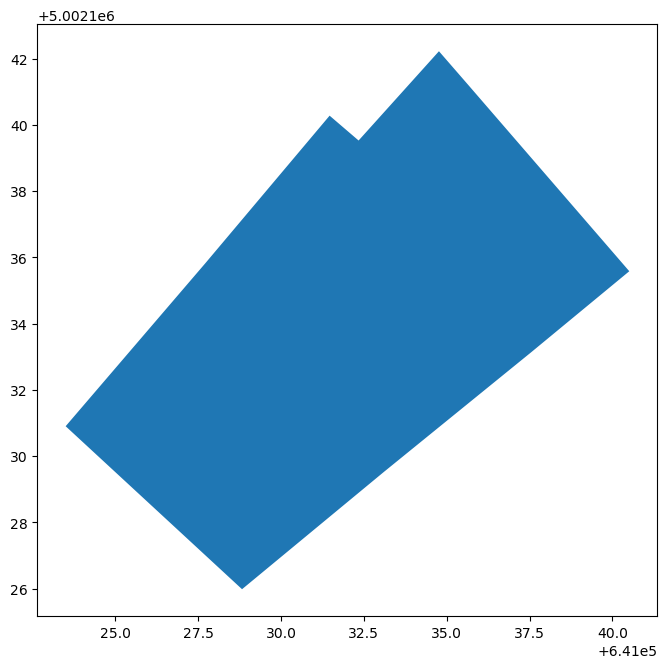

In [6]:
gdf.plot(figsize=(8,8))

In [7]:
gdf.geometry.array

<GeometryArray>
[<POLYGON Z ((641035.649 5002141.205 19.742, 641037.421 5002139.155 19.742, 6...>, <POLYGON Z ((641034.543 5002136.534 37.441, 641030.332 5002133.049 37.441, 6...>]
Length: 2, dtype: geometry

In [12]:
from trimesh.primitives import Extrusion
from trimesh.boolean import union
mutilpoly =[]
volumes = []
for i in range(0, len(gdf.geometry.array)):
    poly = Polygon(gdf.geometry.array[i])
    volume=Extrusion(poly, height=gdf['UN_VOL_QE'][i])
    volume.faces
    mesh=volume.to_mesh()
    volumes.append(mesh)
    mutilpoly.append(poly)
mutilpoly

ValueError: The second dimension of vertices is not 2!

<Axes: >

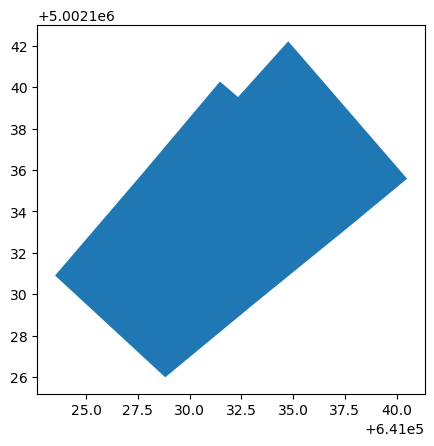

In [23]:
ob = MultiPolygon(mutilpoly)
g = gpd.GeoSeries(ob)
g.plot()

In [18]:
volumes_un = union(volumes)
volumes_un.export("test.obj")

IndexError: list index out of range

In [64]:
import trimesh

In [3]:
gos = gpd.GeoSeries.from_file("./shp/dbgt_building_porch_1_lod1.shp")

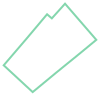

In [4]:
gos[0].boundary

In [5]:
gos.estimate_utm_crs()

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
gos.to_crs("EPSG:32632")

0    POLYGON Z ((641035.649 5002141.205 19.742, 641...
1    POLYGON Z ((641034.543 5002136.534 37.441, 641...
Name: geometry, dtype: geometry

In [7]:
import pyvista as pv

In [8]:
import numpy as np
pts=gos.get_coordinates(include_z=True)

In [ ]:
face0=[14] + list(range(13)) + [0]
polygon0=pv.PolyData(np.array(pts)[:13], faces=face0)
volume0=polygon0.extrude((0,0,17.669), capping=True)

face0=[6] + list(range(6)) + [0]
polygon1=pv.PolyData(np.array(pts)[13:], faces=face0)
volume1=polygon1.extrude((0,0,1.613), capping=True)

pv.global_theme.color_cycler = "default"

pl=pv.Plotter()
pl.add_mesh(volume0)
pl.add_mesh(volume1)

pl.show()

: 